### <u>EDA</u>

Let's start with imports and reading the csv file into a DataFrame, then showing a few rows of it.

In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('combined_df.csv')

In [3]:
print("Total of {} entries in the dataset before cleaning.".format(df.shape[0]))

Total of 60000 entries in the dataset before cleaning.


In [4]:
df = df.drop(columns=['ID']) # We get rid of Book's ID as we don't need that column for exploring the data set
df.head()

,Title,Author,Genre,# Of Pages,Description,Reviews Count,Rating
0,Moishe's Miracle: A Hanukkah Story,"Laura Krauss Melmed,David Slonim",Childrens,32,Kind-hearted Moishe is given a magical frying ...,18,4
1,Count the Monkeys,"Mac Barnett,Kevin Cornell",Childrens,32,Kids will giggle as they count all the animals...,499,4
2,Looking For Trouble,Becky McGraw,Romance,341,"Country singer, Jess Sparks, is finally watchi...",23,4
3,The Alexandria Quartet,Lawrence Durrell,Fiction,884,Lawrence Durrell's series of four novels set i...,458,4
4,Darling,Yuzuha Ougi,Sequential Art,201,Rio was living a perfectly normal high school ...,2,4


---------------

Next step is cleaning the data of any Nulls prior to the analysis.

In [5]:
df = df.dropna()
print("Total of {} entries in the dataset after cleaning Nulls.".format(df.shape[0]))

Total of 51343 entries in the dataset after cleaning.


about 9,000 entries were deleted.

---------
## Statistical properties of the dataset:

In [6]:
df.describe()

,# Of Pages,Reviews Count,Rating
count,51343.000000,51343.000000,51343.000000
mean,264.127788,211.492959,3.904077
std,402.468304,1539.711149,0.393269
min,0.000000,0.000000,0.000000
25%,151.000000,6.000000,4.000000
50%,248.000000,22.000000,4.000000
75%,342.000000,86.000000,4.000000
max,70000.000000,110042.000000,5.000000


In [7]:
df.corr()

,# Of Pages,Reviews Count,Rating
# Of Pages,1.000000,0.029821,0.067393
Reviews Count,0.029821,1.000000,0.021226
Rating,0.067393,0.021226,1.000000


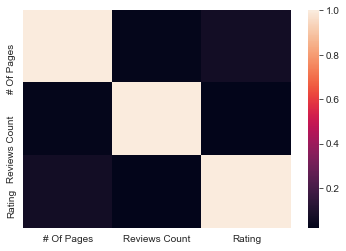

In [8]:
sns.heatmap(df.corr());

As can be observed, there is no correlation between the features, which is what we seek, but there is also insignifincant correlation between the label and the features which might make the learning part more difficult.

-----------

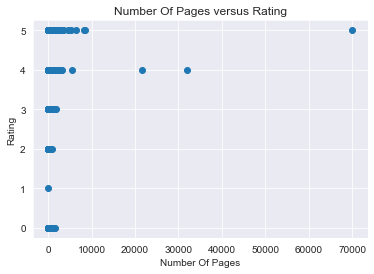

In [9]:
plt.scatter(df['# Of Pages'], df['Rating']);
plt.title('Number Of Pages versus Rating');
plt.xlabel('Number Of Pages');
plt.ylabel('Rating');


Higher number of pages doesn't reflect a better book at all, as there is no apparent correlation. 

----------

In order to be able to plot the histogram properly we plot the values that are within reasonable distance from the mean.

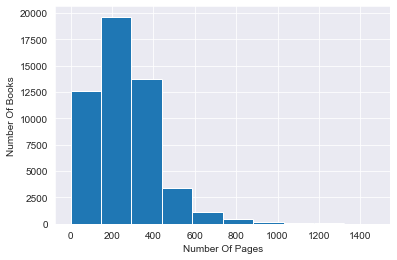

In [10]:
s = df[df['# Of Pages'] <= df['# Of Pages'].mean() + 3*df['# Of Pages'].std()]
plt.hist(s['# Of Pages']);
plt.xlabel('Number Of Pages');
plt.ylabel('Number Of Books');

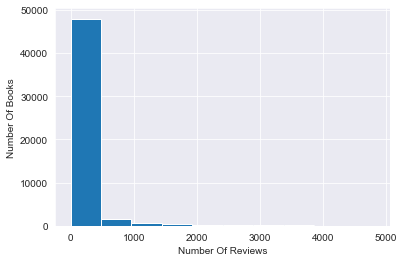

In [11]:
s = df[df['Reviews Count'] <= df['Reviews Count'].mean() + 3*df['Reviews Count'].std()]
plt.hist(s['Reviews Count']);
plt.xlabel('Number Of Reviews');
plt.ylabel('Number Of Books');

### NOTE:
If we'd try to plot the distribution of the entire features, the outliers would make it look like a one big piece. Therefore, we now need to take care of the outliers

### Outliers cleaning

Filtering any outliers that can mislead our model:

In [12]:
df = df[df['# Of Pages'] <= 700] # filtering any books that are longer than 700 pages
df = df[df['Reviews Count'] <= 600] # filtering any books that were reviewed more than 600 times

--------
A brief review regarding 10 most frequent genres in our data set:

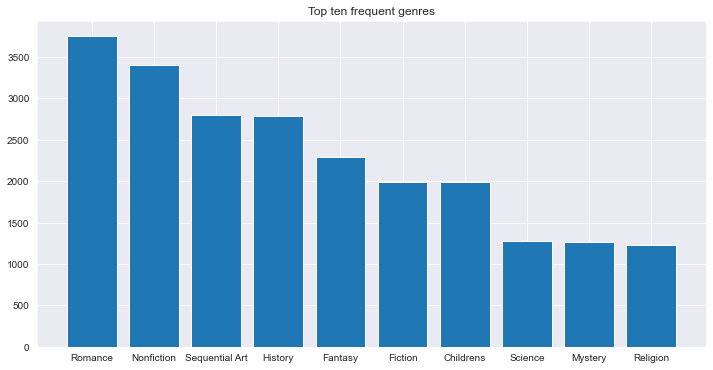

In [13]:
# Sources: https://stackoverflow.com/questions/51080491/matplotlib-how-to-change-figsize-for-double-bar-plot/51080743
# https://stackoverflow.com/questions/40349753

counts = df['Genre'].value_counts()

fig, ax = plt.subplots(figsize=(12,6))
top_10 = counts[:10] # here we get the most frequent genres in the data set
plt.bar(range(10), top_10.values, align='center', tick_label=top_10.keys());
plt.title("Top ten frequent genres");

-----------
Here's a scatterplot that describes the # of pages versus the rating of each book.

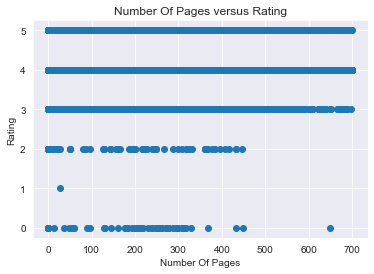

In [14]:
plt.scatter(df['# Of Pages'], df['Rating']);
plt.title('Number Of Pages versus Rating');
plt.xlabel('Number Of Pages');
plt.ylabel('Rating');

As we can see there is no relationship between the features.

-----------
## Quality of the data:

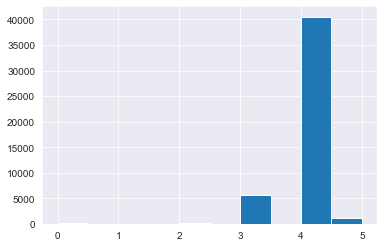

In [15]:
plt.hist(df['Rating']);

----------------

There's a severe imbalance in the labels of data, hence we'll need to balance it and adjust it to a data of smaller size to make sure the imbalanced label won't interrupt our learning process.


In [16]:
balance_df = df[df['Rating'] != 4]
rating_4 = df[df['Rating'] == 4]
rating_4 = rating_4.sample(n = 7000) # Here we reduce the amount of books that were rated with 4 stars
balanced_df = pd.concat([balance_df, rating_4])

----------
There is only one book rated 1 star, so in order to help the learning process, let's remove it (otherwise it'll disturb the learning).

In [17]:
balanced_df = balanced_df[balanced_df['Rating']!= 1]

Let's observe the changes:

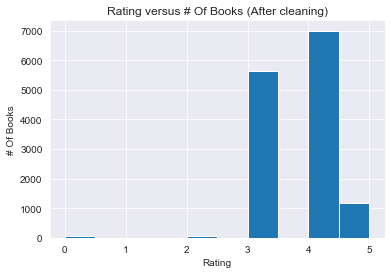

In [21]:
plt.hist(balanced_df['Rating']);
plt.title('Rating versus # Of Books (After cleaning)');
plt.xlabel('Rating');
plt.ylabel('# Of Books');

In [19]:
balanced_df['Rating'].value_counts()

4    7000
3    5629
5    1168
2      72
0      59
Name: Rating, dtype: int64

In [23]:
print("Total of {} entries in the dataset after cleaning.".format(balanced_df.shape[0]))

Total of 13928 entries in the dataset after cleaning.


Conversion of DataFrame to CSV file:

In [20]:
balanced_df.to_csv("combined_finished_df.csv", index=False)

End of EDA phase.